# Factors effecting Borrower Rate
## by Rashika Karki

## Investigation Overview

In this analysis I investigated the features that influences borrowers rate, where I explored 10 variables, I found some insights that were really interesting which I can included in the slide.

## Dataset Overview

The loan data from Prosper comprise 113,937 entries of loans with 81 different columns. This dataset has alot of information but in this analysis, we will be solely focusing on everything related to loan.

The description of each column can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_prosper_loans = pd.read_csv('prosperLoanData.csv')

In [3]:
df_prosper_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df_prosper_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df_prosper_loans.shape

(113937, 81)

**Observation:**

- There are all together 113937 rows adn 81 columns.
- Since we will be focusing on features related to loans we will not be using all the 81 columns. 



**Features we will BorrowerRate on in this analysis**:

- Term : The length of the loan expressed in months.
- LoanStatus : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- BorrowerRate : iThe Borrower's interest rate for this loan. 
- ListingCategory : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- IsBorrowerHomeowner :  A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created.
- IncomeVerifiable : The borrower indicated they have the required documentation to support their income.
- LoanOriginalAmount : The origination amount of the loan.
- LoanOriginationDate : The date of the origination of the loan.
- Recommendations : Number of recommendations the borrower had at the time the listing was created.
- DebtToIncomeRatio : The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

## Cleaning

In [6]:
df_prosper_loans = df_prosper_loans[['Term','LoanStatus','BorrowerRate', 'ListingCategory (numeric)',
                   'IsBorrowerHomeowner', 'StatedMonthlyIncome',
                   'IncomeVerifiable', 'LoanOriginationDate',
                   'LoanOriginalAmount', 'Recommendations',
                   'DebtToIncomeRatio']].copy()

In [7]:
df_prosper_loans.head()

,Term,LoanStatus,BorrowerRate,ListingCategory (numeric),IsBorrowerHomeowner,StatedMonthlyIncome,IncomeVerifiable,LoanOriginationDate,LoanOriginalAmount,Recommendations,DebtToIncomeRatio
0,36,Completed,0.1580,0,True,3083.333333,True,2007-09-12 00:00:00,9425,0,0.17
1,36,Current,0.0920,2,False,6125.000000,True,2014-03-03 00:00:00,10000,0,0.18
2,36,Completed,0.2750,0,False,2083.333333,True,2007-01-17 00:00:00,3001,0,0.06
3,36,Current,0.0974,16,True,2875.000000,True,2012-11-01 00:00:00,10000,0,0.15
4,36,Current,0.2085,2,True,9583.333333,True,2013-09-20 00:00:00,15000,0,0.26


In [8]:
df_prosper_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
IsBorrowerHomeowner          113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
IncomeVerifiable             113937 non-null bool
LoanOriginationDate          113937 non-null object
LoanOriginalAmount           113937 non-null int64
Recommendations              113937 non-null int64
DebtToIncomeRatio            105383 non-null float64
dtypes: bool(2), float64(3), int64(4), object(2)
memory usage: 8.0+ MB


**Observation:**

- LoanOriginationDate has the datatype object instead of datetime.
- There is some data missing in DebtToIncomeRatio
- ListingCategory (numeric) column name can be changed to just ListingCategory
- ListingCategory is a categorical variable

In [9]:
#Renaming the column
df_prosper_loans.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, 
                      inplace=True)

In [10]:
# converting 'ListingCategory' to category data type

df_prosper_loans['ListingCategory']=df_prosper_loans['ListingCategory'].astype('category')

# converting 'LoanOriginationDate' to timestamp datatype

df_prosper_loans['LoanOriginationDate']=pd.to_datetime(df_prosper_loans['LoanOriginationDate'])

In [11]:
df_prosper_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
Term                   113937 non-null int64
LoanStatus             113937 non-null object
BorrowerRate           113937 non-null float64
ListingCategory        113937 non-null category
IsBorrowerHomeowner    113937 non-null bool
StatedMonthlyIncome    113937 non-null float64
IncomeVerifiable       113937 non-null bool
LoanOriginationDate    113937 non-null datetime64[ns]
LoanOriginalAmount     113937 non-null int64
Recommendations        113937 non-null int64
DebtToIncomeRatio      105383 non-null float64
dtypes: bool(2), category(1), datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 7.3+ MB


In [12]:
missing = df_prosper_loans.query('DebtToIncomeRatio == "NaN"')['Term'].count()
percent = (missing/df_prosper_loans.shape[0])*100
print(percent)

7.507657740681253


In [13]:
#Since only 7.5% of data are missing dropping the rows where 'DebtToIncomeRatio' is NaN

drop_index = df_prosper_loans.query('DebtToIncomeRatio == "NaN"').index
df_prosper_loans.drop(index=drop_index, inplace=True)

# reset index
df_prosper_loans.reset_index(inplace=True, drop=True)



In [14]:
df_prosper_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 11 columns):
Term                   105383 non-null int64
LoanStatus             105383 non-null object
BorrowerRate           105383 non-null float64
ListingCategory        105383 non-null category
IsBorrowerHomeowner    105383 non-null bool
StatedMonthlyIncome    105383 non-null float64
IncomeVerifiable       105383 non-null bool
LoanOriginationDate    105383 non-null datetime64[ns]
LoanOriginalAmount     105383 non-null int64
Recommendations        105383 non-null int64
DebtToIncomeRatio      105383 non-null float64
dtypes: bool(2), category(1), datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 6.7+ MB


## Univariate Exploration



###  Response Variable

### Borrower Rate

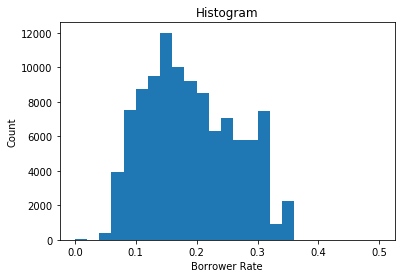

In [15]:
bin_width = 0.020
bin_edges = np.arange(df_prosper_loans['BorrowerRate'].min(), 
                      df_prosper_loans['BorrowerRate'].max() + bin_width, 
                      bin_width)

# plot histogram for BorrowerRate
plt.hist(data=df_prosper_loans, x = 'BorrowerRate', bins = bin_edges)
plt.title("Histogram")
plt.xlabel('Borrower Rate')
plt.ylabel('Count');

**Observation:**
- The Borrower Rate is  right skewed unimodal distribution. 
- The peak of frequency is near 0.15.


### Predictor Variable

### Term 

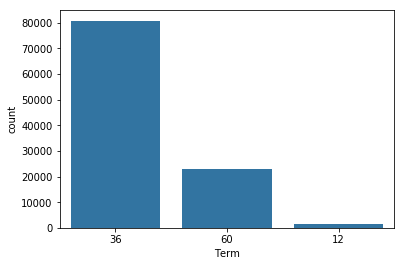

In [16]:
base_color = sb.color_palette()[0]
order_bars = df_prosper_loans['Term'].value_counts().index
sb.countplot(data=df_prosper_loans, x='Term', color=base_color,
              order=order_bars);

**Observation:**
- The highest frequency is about 80000 with 36 months term, followed by 60 and finally 12 months term.



### Loan Status

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

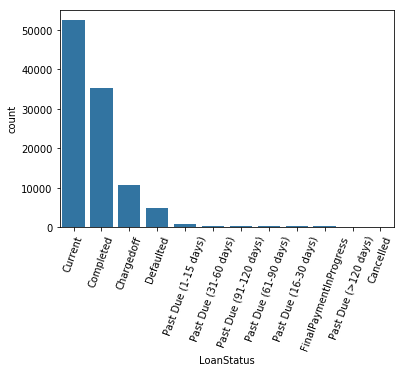

In [17]:
base_color = sb.color_palette()[0]
order_bars = df_prosper_loans['LoanStatus'].value_counts().index
sb.countplot(data=df_prosper_loans, x='LoanStatus', color=base_color,
              order=order_bars)
plt.xticks(rotation=70)

**Observation:**
- We can see that most of the loan are current and few are completed, however only few loans are past due data.



### ListingCategory

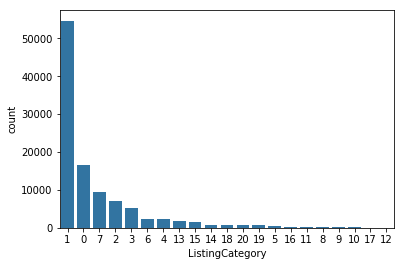

In [18]:
base_color = sb.color_palette()[0]
order_bars = df_prosper_loans['ListingCategory'].value_counts().index
sb.countplot(data=df_prosper_loans, x='ListingCategory', 
              color=base_color, order=order_bars)

**Observation**:

- From the bar graph shows that the frequency reduces rapidly over the first five loan categories.1 which is "Debt Consolidation" has the highest frequency followed by 0 which is "Not Available" , 7 which is other, 2 which is Home Improvement, 3 which is Business which is more than 80% of the total data.

### IsBorrowerHomeowner

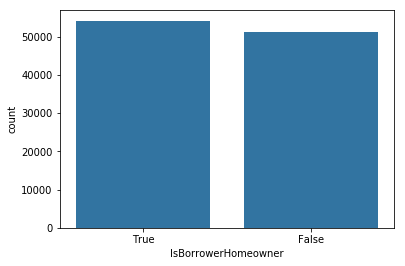

In [19]:
base_color = sb.color_palette()[0]
order_bars = df_prosper_loans['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data=df_prosper_loans, x='IsBorrowerHomeowner', 
              color=base_color, order=order_bars)

**Observation** :
- Their seems to be about 50-50 probabilty for the borrower to be a home owner.

### StatedMonthlyIncome 

In [20]:
df_prosper_loans['StatedMonthlyIncome'].describe()

count    105383.000000
mean       5650.719215
std        4941.369709
min           0.000000
25%        3333.333333
50%        4750.000000
75%        6835.166666
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

Text(0,0.5,'count')

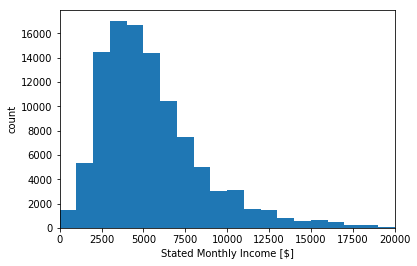

In [21]:
#Since it is discrete variable

bin_width = 1000
bin_edges=np.arange(df_prosper_loans['StatedMonthlyIncome'].min(), 
          df_prosper_loans['StatedMonthlyIncome'].max() + bin_width, 
          bin_width)

# plot histogram for StatedMonthlyIncome
plt.hist(data=df_prosper_loans, x = 'StatedMonthlyIncome', 
         bins = bin_edges)
#Since Third quartile value is 6835 setting a limit to 20000 
plt.xlim([0,20000])
plt.xlabel('Stated Monthly Income [$]')
plt.ylabel('count')

**Observation**:
- Stated monthly income is positely skewed, only few have higher salary and about 90% has monthly salary between 0 to 10000
- Since the maximum is 483333.33, there seems to be some outliers.

In [22]:
#Cleaning the outliers
df_prosper_loans.query('StatedMonthlyIncome > 30000').count()

Term                   264
LoanStatus             264
BorrowerRate           264
ListingCategory        264
IsBorrowerHomeowner    264
StatedMonthlyIncome    264
IncomeVerifiable       264
LoanOriginationDate    264
LoanOriginalAmount     264
Recommendations        264
DebtToIncomeRatio      264
dtype: int64

In [23]:
df_prosper_loans = df_prosper_loans[df_prosper_loans['StatedMonthlyIncome']<30000]

In [24]:
df_prosper_loans.query('StatedMonthlyIncome > 30000').count()

Term                   0
LoanStatus             0
BorrowerRate           0
ListingCategory        0
IsBorrowerHomeowner    0
StatedMonthlyIncome    0
IncomeVerifiable       0
LoanOriginationDate    0
LoanOriginalAmount     0
Recommendations        0
DebtToIncomeRatio      0
dtype: int64

### IncomeVerifiable

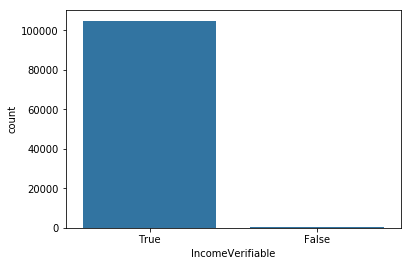

In [25]:
base_color = sb.color_palette()[0]
order_bars = df_prosper_loans['IncomeVerifiable'].value_counts().index
sb.countplot(data=df_prosper_loans, x='IncomeVerifiable', 
              color=base_color, order=order_bars)

**Observation:**
- Almost all of the borrowers seems to have verification of the income.

### LoanOriginationDate

In [26]:
df_prosper_loans['loan_year']=df_prosper_loans['LoanOriginationDate'].dt.year

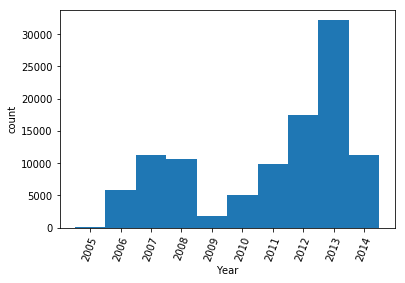

In [27]:
bin_width = 1
bin_edges =np.arange(df_prosper_loans['loan_year'].min(), 
          df_prosper_loans['loan_year'].max() + bin_width + 0.1, 
          bin_width)

plt.hist(data=df_prosper_loans, 
         x = df_prosper_loans['loan_year'], 
         bins = bin_edges)

plt.xlabel('Year')
plt.ylabel('count')
plt.xticks(np.arange(df_prosper_loans['loan_year'].min() + 0.5, 
                     df_prosper_loans['loan_year'].max() + 0.5 + bin_width, 
                     bin_width),
           np.arange(df_prosper_loans['loan_year'].min(), 
                     df_prosper_loans['loan_year'].max() + bin_width, 
                     bin_width),
           rotation=70);

**Observation**:

- The histogram shows a bimodal distribution. 
- The first peak is during the years 2007 and 2008. 
- The other peak is during the year 2013. 
- Sharp decline during 2009


### LoanOriginalAmount

Text(0,0.5,'Count')

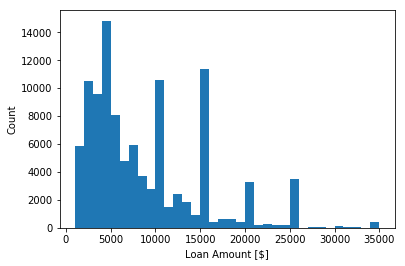

In [28]:
bin_width = 1000
bin_edges = np.arange(df_prosper_loans['LoanOriginalAmount'].min(), 
          df_prosper_loans['LoanOriginalAmount'].max() + bin_width, 
          bin_width)

plt.hist(data=df_prosper_loans, x = 'LoanOriginalAmount', 
         bins = bin_edges)
plt.xlabel('Loan Amount [$]')
plt.ylabel('Count')

**Observation**:
- The histogram shows a right-skewed distribution with a peak of around loan amount 5,000 with some spikes aroud 15000,20000 and 250000.

### Recommendation


([<matplotlib.axis.XTick at 0x1add2efa9b0>,
 <a list of 25 Text xticklabel objects>)

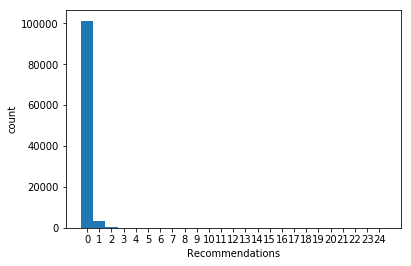

In [29]:
bin_width = 1
bin_edges = np.arange(df_prosper_loans['Recommendations'].min(), 
          df_prosper_loans['Recommendations'].max() + 0.1 + bin_width, 
          bin_width)

plt.hist(data=df_prosper_loans, x = 'Recommendations', 
         bins = bin_edges)
plt.xlabel('Recommendations')
plt.ylabel('count')
plt.xticks(np.arange(df_prosper_loans['Recommendations'].min() + 0.5, 
                     df_prosper_loans['Recommendations'].max() + 0.5 + bin_width, 
                     bin_width),
           np.arange(df_prosper_loans['Recommendations'].min(), 
                     df_prosper_loans['Recommendations'].max() + bin_width, 
                     bin_width))

**Observation**:
- The histogram shows that the vast majority of borrowers had zero recommendations. 

### DebtToIncomeRatio

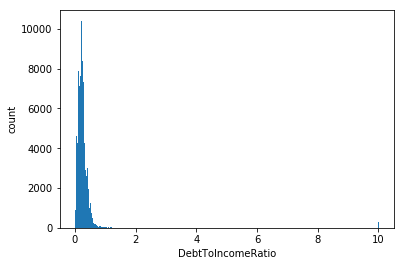

In [30]:
bin_width = 0.025
bin_edges = np.arange(df_prosper_loans['DebtToIncomeRatio'].min(), 
                      df_prosper_loans['DebtToIncomeRatio'].max() + bin_width, 
                      bin_width)

# plot histogram for DebtToIncomeRatio
plt.hist(data=df_prosper_loans, x = 'DebtToIncomeRatio', bins = bin_edges)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count');

There seems to be some outliers

In [31]:
df_prosper_loans['DebtToIncomeRatio'].describe()

count    105099.000000
mean          0.276439
std           0.552411
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

3rd quartile is around 0.32 but the maximum seems to be 10.01, so there is indeed some outliers.

In [32]:
df_prosper_loans.query('DebtToIncomeRatio > 8')

,Term,LoanStatus,BorrowerRate,ListingCategory,IsBorrowerHomeowner,StatedMonthlyIncome,IncomeVerifiable,LoanOriginationDate,LoanOriginalAmount,Recommendations,DebtToIncomeRatio,loan_year
22,36,Current,0.3134,1,False,118.333333,True,2013-02-05,4000,0,9.20,2013
208,36,Completed,0.1000,0,True,0.083333,False,2007-03-07,1000,0,10.01,2007
529,36,Completed,0.0935,0,False,0.083333,False,2007-04-25,1500,0,10.01,2007
577,36,Current,0.3177,1,False,3.833333,True,2012-02-23,2000,0,10.01,2012
1136,36,Completed,0.1072,0,False,0.083333,False,2007-06-15,3000,0,10.01,2007
1758,36,Defaulted,0.0800,0,False,0.083333,False,2007-05-30,3000,1,10.01,2007
1972,36,Completed,0.0930,1,True,17083.333333,True,2010-05-25,13500,0,10.01,2010
2032,36,Completed,0.1572,0,False,0.083333,False,2007-02-08,7000,0,10.01,2007
2203,36,Defaulted,0.1800,0,False,0.083333,False,2007-05-03,4000,0,10.01,2007
2502,36,Completed,0.1750,0,False,0.083333,False,2006-10-23,7500,0,10.01,2006


In [33]:
#Dropping the outliers
df_prosper_loans = df_prosper_loans[df_prosper_loans['DebtToIncomeRatio'] <8]

In [34]:
df_prosper_loans['DebtToIncomeRatio'].describe()

count    104817.000000
mean          0.250371
std           0.229225
min           0.000000
25%           0.140000
50%           0.220000
75%           0.310000
max           7.990000
Name: DebtToIncomeRatio, dtype: float64

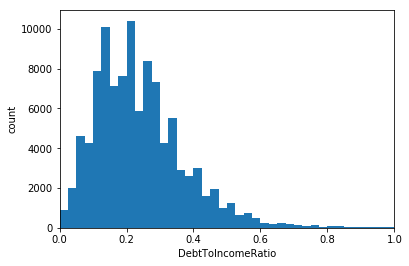

In [35]:
bin_width = 0.025
bin_edges = np.arange(df_prosper_loans['DebtToIncomeRatio'].min(), 
                      df_prosper_loans['DebtToIncomeRatio'].max() + bin_width, 
                      bin_width)

# plot histogram for DebtToIncomeRatio
plt.hist(data=df_prosper_loans, x = 'DebtToIncomeRatio', bins = bin_edges)
plt.xlim(0, 1)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count');

**Observation**:
- The histogram is right-skewedand peak of the frequency is around 0.25.

## Bivariate Exploration



### Finding relationship between all predictor and response variable

### StatedMonthlyIncome vs. BorrowerRate

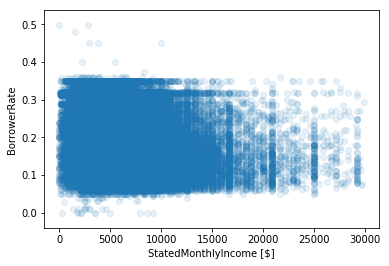

In [36]:
plt.scatter(data=df_prosper_loans, 
            x=df_prosper_loans['StatedMonthlyIncome'],
            y='BorrowerRate', alpha=1/10)

plt.xlabel('StatedMonthlyIncome [$]')
plt.ylabel('BorrowerRate');

**Observation**:
There seems to be no correlation visible between these variables. There seems to be alot of concentration around 0 to 15000 monthly income and 0.1 to 0.3 borrower rate. This result is a little surprising as there is usually some correlation between montly income and borrower rate : the higher the monthly income, the lower the borrower rate.

### LoanOriginalAmount vs. BorrowerRate

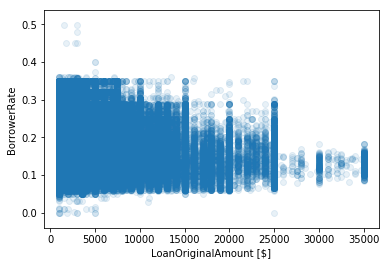

In [37]:
plt.scatter(data=df_prosper_loans, 
            x=df_prosper_loans['LoanOriginalAmount'],
            y='BorrowerRate', alpha=1/10)

plt.xlabel('LoanOriginalAmount [$]')
plt.ylabel('BorrowerRate');

**Observation**:
From the scatter plot we can observe something interesting that is higher the loan amount the lesser is the borrower rate.

### DebtToIncomeRatio vs. BorrowerRate

Text(0,0.5,'DebtToIncomeRatio')

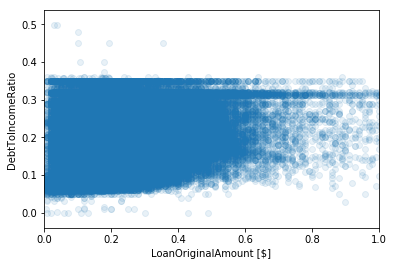

In [38]:
plt.scatter(data=df_prosper_loans, 
            x=df_prosper_loans['DebtToIncomeRatio'],
            y='BorrowerRate', alpha=1/10)
plt.xlim([0,1])
plt.xlabel('LoanOriginalAmount [$]')
plt.ylabel('DebtToIncomeRatio')

**Observation**:
From the scatter plot we can observe that there is no correlation visible between the two variables. like with the case of monthly income this is quite surprising as it is believed that the higher the debt to income ratio, the higher the borrower rate.

###  Term vs. BorrowerRate

c:\users\my pc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'DebtToIncomeRatio')

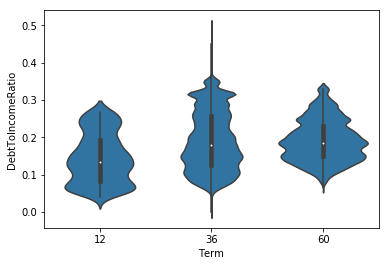

In [39]:
sb.violinplot(data=df_prosper_loans, x='Term', y='BorrowerRate',
            color=base_color)

plt.xlabel('Term')
plt.ylabel('DebtToIncomeRatio')

**Observation**:
From the violinplot we can see that the borrower rate tends to increase with the length of the loan. This behavior makes sense as it is believed that the longer the length of the issued loan, the higher the borrower rate due to increasing default risk with an increasing length of the loan. 

### Recommendation and BorrowerRate

c:\users\my pc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


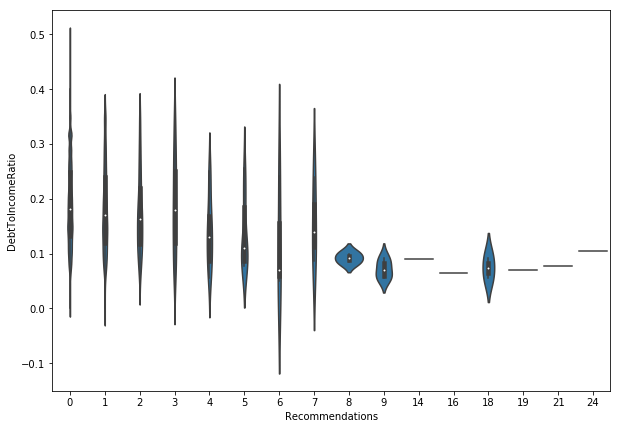

In [40]:
# plot boxplot
plt.figure(figsize=[10, 7])
sb.violinplot(data=df_prosper_loans, x='Recommendations', 
            y='BorrowerRate', color=base_color)

plt.xlabel('Recommendations')
plt.ylabel('DebtToIncomeRatio');

**Observation**:
Observing the median of violinplot it shows that in general, the median borrower rate tends to decrease with the number of recommendations. 

### ListingCategory vs. BorrowerRate

c:\users\my pc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


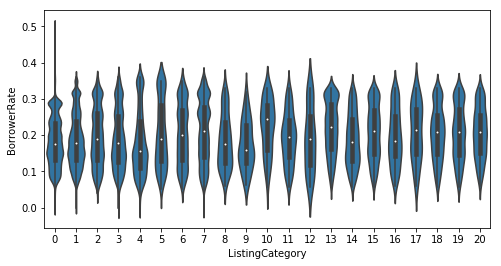

In [41]:
plt.figure(figsize=[8, 4])
sb.violinplot(data=df_prosper_loans, x='ListingCategory', 
               y='BorrowerRate', color=base_color)

**Observation**: In this violinplot, you can see that some categories like 10 (Cosmetic Procedure), have a significantly higher median borrower rate) than the average median borrower rate. On the other side, some categories like 9 (Boat) have a significantly lower median borrower rate (about 0.16) than the average median borrower rate.

### IsBorrowerHomeowner vs. BorrowerRate

c:\users\my pc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


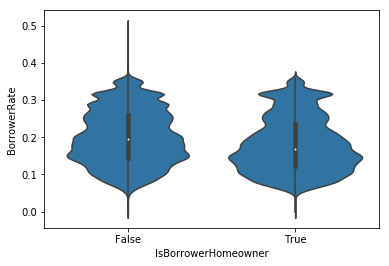

In [42]:
sb.violinplot(data=df_prosper_loans, x='IsBorrowerHomeowner', 
            y='BorrowerRate', color=base_color);

**Observation**: The violinplot shows that the group of homeowners have a smaller median borrower rate (approximately 0.2) compared to the non-homeowners (around 0.18) which makes sense as borrowers who can offer a home have a lower risk premium. Moreover, the Borrowe Rate First and Third Quartile are lower for the homeowners compared to the non-homeowners as well.

### LoanOriginationDate vs. BorrowerRate

c:\users\my pc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


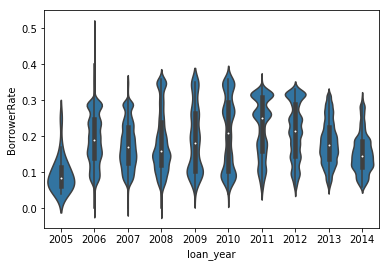

In [43]:
sb.violinplot(data=df_prosper_loans, x='loan_year', 
            y='BorrowerRate', color=base_color)

**Observation**: 

This boxplot shows that the year of the loan issuance has a massive influence on the borrower rate. There is a very high flunctuation between the median and the year.

### Conclusion:

There is no correlation visible between the two variables: StatedMonthlyIncome and BorrowerRate. Also,between the variables LoanOriginalAmount and BorrowerRate, no correlation was found. Nonetheless, dots in the scatterplot display that almost no high amount and high borrower rate loans were issued compared to other types of loans.
Additionally, there is no correlation between the two variables: DebtToIncomeRatio and BorrowerRate. However, the scatterplot indicates that fewer loans were issued where the borrower had a high DebtToIncomeRatio (0.6 - 1.0) compared to where borrowers had a lower DebtToIncomeRatio (0 - 0.6).
Plus, there is a slight difference in the median borrower rate (from 0.14 to 0.18) between 12, 36 and 60 month-term loans. Moreover, there is a small difference in the median borrower rate (from 0.18 to 0.2 ) between homeowners and non-homeowners. Furthermore, the year of the loan issuance has a significantly high influence (range between 0.08 and 0.25) on the median borrower rate.

## Multivariate Exploration


### StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate

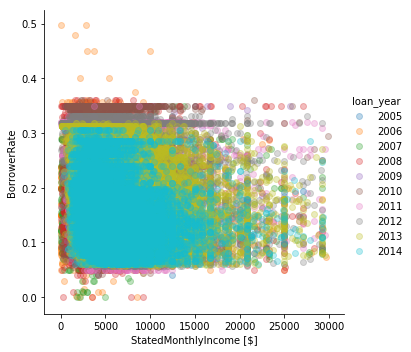

In [44]:
ax = sb.FacetGrid(data = df_prosper_loans, 
                  hue = 'loan_year', height = 5)

ax.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerRate', alpha=3/10)

plt.xlabel('StatedMonthlyIncome [$]')
ax.add_legend()

**Observation**:
As seen in Bivariate Exploration, the following scatterplot is focused on the bulk of the data. However, we can see that only during the year 2006 was the borrower rate higher than 0.35

### LoanOriginalAmount vs. BorrowerRate & LoanOriginationDate

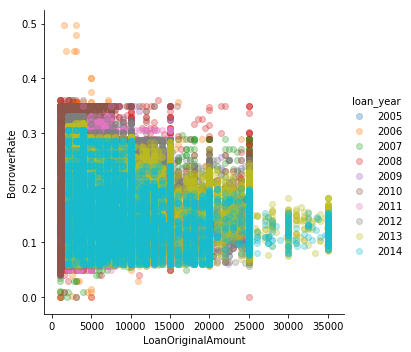

In [45]:
ax = sb.FacetGrid(data = df_prosper_loans, 
                  hue = 'loan_year', height = 5)

ax.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=3/10)

plt.xlabel('LoanOriginalAmount')
ax.add_legend()

**Observation**:
- There does not seems to be much relation among these variable however we can observe that with the year loan original amont is increasing and borrower rate is decreasing.

### StatedMonthlyIncome vs. BorrowerRate and LoanOriginationDate

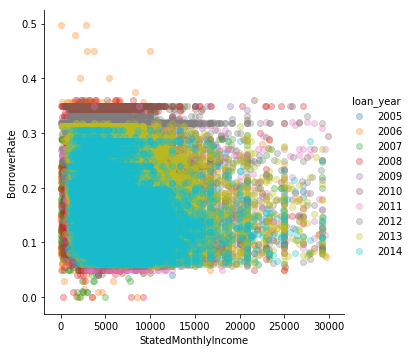

In [46]:
ax = sb.FacetGrid(data = df_prosper_loans, 
                  hue = 'loan_year', height = 5)

ax.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerRate', alpha=3/10)

plt.xlabel('StatedMonthlyIncome')
ax.add_legend()

**Observation**:
There does not seems to be much relation among these variable.

### BorrowerRate by LoanOriginationDate & IsBorrowerHomeowner

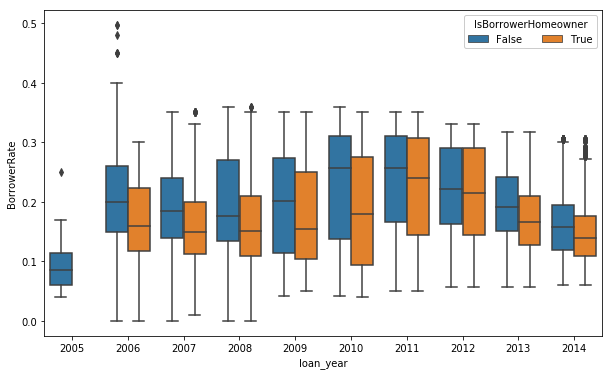

In [47]:
plt.figure(figsize=[10,6])
ax = sb.boxplot(data=df_prosper_loans, x='loan_year',
                 y='BorrowerRate', hue='IsBorrowerHomeowner')
ax.legend(loc=1, ncol=3, framealpha=1, title='IsBorrowerHomeowner')

**Observation**:
From the plot above we can clearly see that borrower who are home owner has less Borrower rate and as from the previous observation borrower rate also seems to be decresing since 2011.

### Conclusion:

From the multivariate plots we can clearly confirm that year has a very strong correlation with borrower debt.Moreover, the clustured boxplot (BorrowerRate by LoanOriginationDate & IsBorrowerHomeowner) showed that in some years homeownership has a significant influence on the borrower rate, in other years however the homeownership has only a slight influence.



## Key Insights and summary of findings

- The year has a very strong correlation with borrower debt.
- The group of homeowners have a smaller median borrower rate (approximately 0.2) compared to the non-homeowners (around 0.18) which makes sense as borrowers who can offer a home have a lower risk premium. So, The borrowers who owns a home tends to have less borrower rate than those who does not have house.
- Borrower rate tends to increase with terms.
- The median borrower rate tends to decrease with the number of recommendations. 
- The frequency reduces rapidly over the first five loan categories.1 which is "Debt Consolidation" has the highest frequency followed by 0 which is "Not Available" , 7 which is other, 2 which is Home Improvement, 3 which is Business which is more than 80% of the total data.
- The higher the loan amount the lesser is the borrower rate.

>So, after looking at all these insights we can see that year, homeowning status,loan amount, recommendations, loan categories and terms seems to influence the borrower rate.